In [6]:
import sys
import numpy as np
import dill
import matplotlib.pyplot as plt
%matplotlib inline

import coremagmodels as cm

sys.path.append('../')
import coreflows as cf
sf = cf.advect.SteadyFlow()
wv = cf.advect.Waves()
adv = cf.advect.Advect()
svn = cf.svnoise

## Load Data to Analyze

In [2]:
magmod = cm.models.Chaos6()

In [3]:
# Import and create analytic waves 
wave_fit = dill.load(open('../coreflows/data/wavefits012.p','rb'))
c012 = wave_fit['c012']
f012 = wave_fit['f012']

In [4]:
syn_data = dill.load(open('./data_4_waves.m','rb'))
locals().update(syn_data)

# Create Synthetic Noise

In [16]:
lmax_sr = 14
SVr = SV-SV_steadyflow
weights_s = cf.hermite.fun((th-90)/16, 0)
SVr_rms = cf.analyze.rms_region_allT(SVr, weights=weights_s)

SVr_sh = adv.v2vSH_allT(SVr)
SVr_l14 = adv.vSH2v_allT(SVr_sh, l_max=lmax_sr, Nth=Nth)

/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


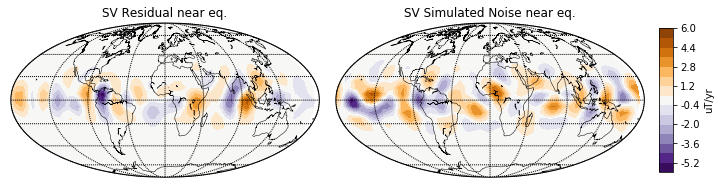

In [27]:
SVr_fft = svn.get_lm_fft(T, SVr_sh)
SVnoise, SVnoise_sh = svn.generate_rand_SV(T, SVr_fft, normalize_to_rms=SVr_rms, norm_weights=weights_s)

i=10
cm.plot.two_contourf(weights_s[:,None]*SVr_l14[i,:,:]/1e3, weights_s[:,None]*SVnoise[i,:,:]/1e3, 
                     title1='SV Residual near eq.', title2='SV Simulated Noise near eq.',clbl='uT/yr')
